In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
data = pd.read_csv(r"C:\Users\HELL\Downloads\Student_performance_data _.csv")
data.info()
data.head()

C:\Users\HELL\AppData\Roaming\Python\Python38\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.0' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [2]:
df = data.copy()
df.head()
df['Gender'] = df['Gender'].replace({0:'male', 1:'female'})
df['Ethnicity'] = df['Ethnicity'].replace({0: "Caucasian", 
                                           1: "African American",
                                           2: "Asian",
                                           3: "Other"})
df['ParentalEducation'] = df['ParentalEducation'].replace({0: "None",
                                                              1: "High School",
                                                              2: "Some College",
                                                              3: "Bachelor's",
                                                              4: "Higher"})
df['ParentalSupport'] = df['ParentalSupport'].replace({0: "None",
                                                              1: "Low",
                                                              2: "Moderate",
                                                              3: "High",
                                                              4: "Very High"})
df['Tutoring'] = df['Tutoring'].replace({0: "No", 1 : "Yes"})
df['GradeClass'] = df['GradeClass'].replace({0: "A", 1: "B", 2: "C", 3: "D", 4: "F"})
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,female,Caucasian,Some College,19.833723,7,Yes,Moderate,0,0,1,0,2.929196,C
1,1002,18,male,Caucasian,High School,15.408756,0,No,Low,0,0,0,0,3.042915,B
2,1003,15,male,Asian,Bachelor's,4.210570,26,No,Moderate,0,0,0,0,0.112602,F
3,1004,17,female,Caucasian,Bachelor's,10.028829,14,No,High,1,0,0,0,2.054218,D
4,1005,17,female,Caucasian,Some College,4.672495,17,Yes,High,0,0,0,0,1.288061,F


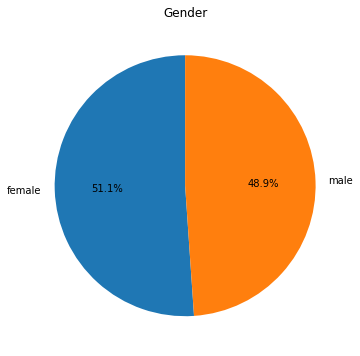

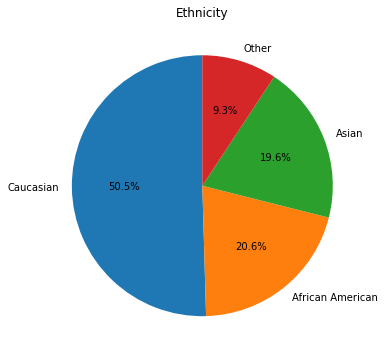

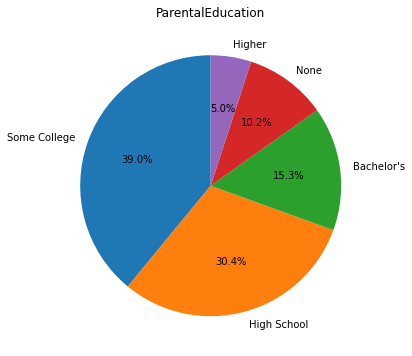

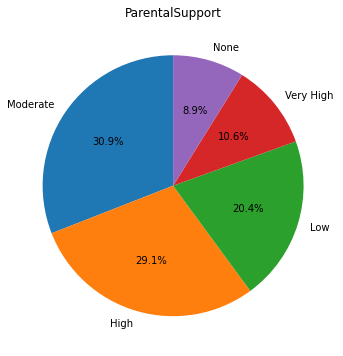

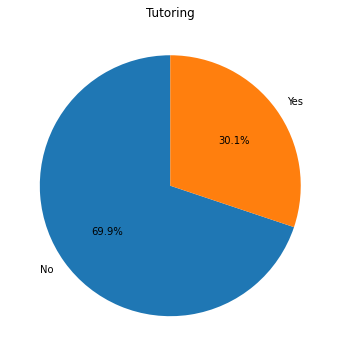

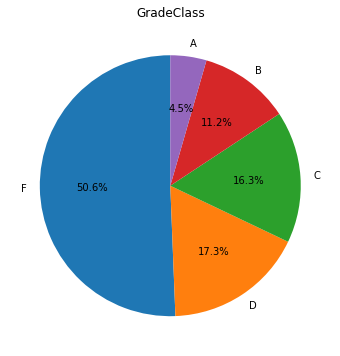

In [3]:
df_fill = df[['Gender', 'Ethnicity', 'ParentalEducation', 'ParentalSupport', 'Tutoring', 'GradeClass']]

for column in df_fill:
  plt.figure(figsize=(6, 6))
  df_fill[column].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
  plt.title(column)
  plt.ylabel('')
  plt.show()

In [4]:
numerical = df.select_dtypes(include=['float64'])

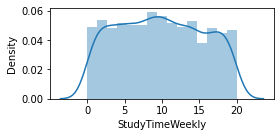

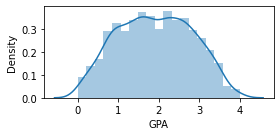

In [5]:
for i in numerical:
    plt.figure(figsize=(4,2))
    sns.distplot(numerical[i])
    plt.tight_layout()
    plt.show()

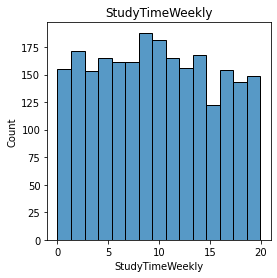

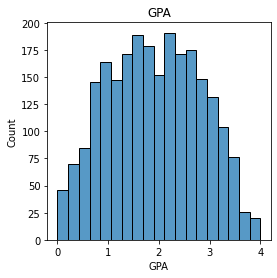

In [6]:
for i in numerical:
  plt.figure(figsize=(4, 4))
  sns.histplot(numerical[i])
  plt.title(i)
  plt.show()

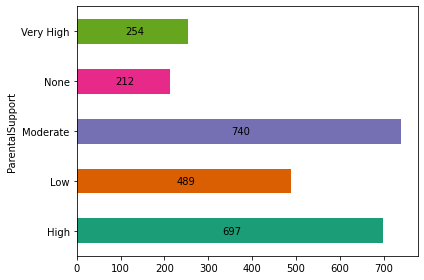

In [7]:
new_data = df_fill.join(numerical)
new_data.head()

ax1=new_data.groupby('ParentalSupport').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))

for container in ax1.containers:
    ax1.bar_label(container,label_type="center",padding=2)

plt.tight_layout()
plt.show()
    

In [8]:
gradeg=df.groupby("GradeClass")["Gender"].value_counts().reset_index()

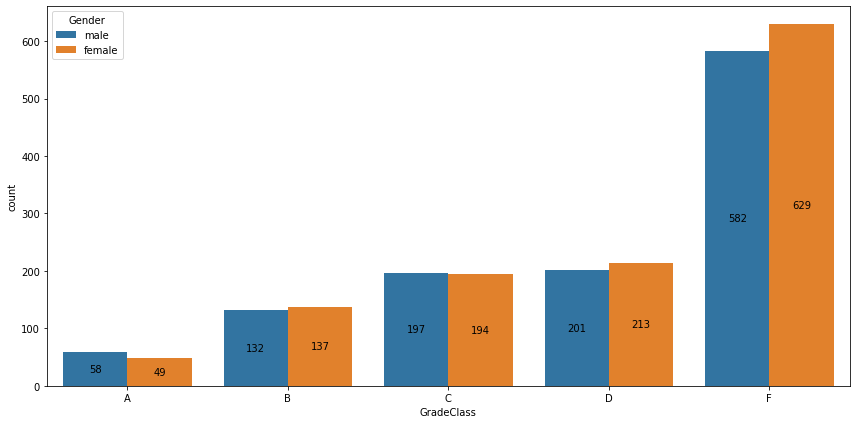

In [9]:
plt.figure(figsize=(12,6))
ax2=sns.barplot(x="GradeClass",y="count",hue="Gender",data=gradeg)
for x in ax2.containers:
    ax2.bar_label(x,label_type="center",)

plt.tight_layout()
plt.show()


In [10]:
new_data.columns

Index(['Gender', 'Ethnicity', 'ParentalEducation', 'ParentalSupport',
       'Tutoring', 'GradeClass', 'StudyTimeWeekly', 'GPA'],
      dtype='object')

In [11]:
group = new_data.groupby(["ParentalEducation","Gender"]).size().reset_index(name="Count")

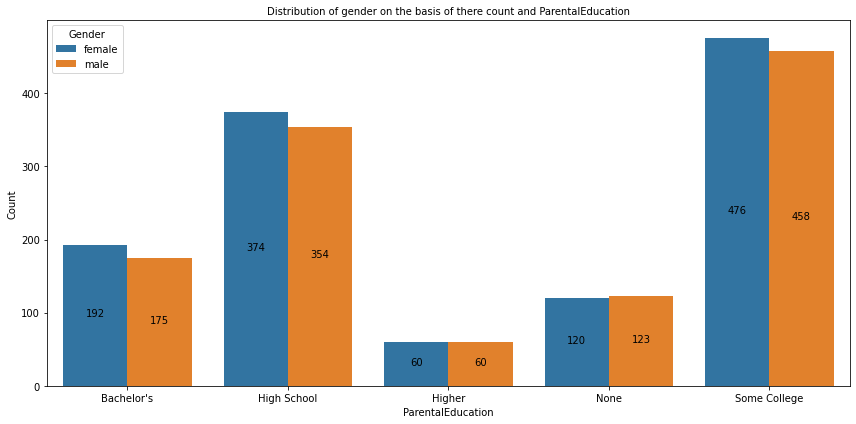

In [12]:
plt.figure(figsize=(12,6))
ax3=sns.barplot(x="ParentalEducation",y="Count",hue="Gender",data=group)

for container in ax3.containers:
    ax3.bar_label(container,fmt = "%d",label_type='center',padding=2)

plt.title("Distribution of gender on the basis of there count and ParentalEducation",fontsize=10)
plt.xlabel("ParentalEducation")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


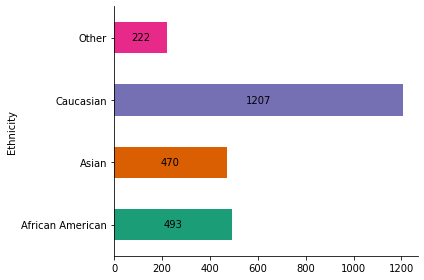

In [13]:
ax4=new_data.groupby('Ethnicity').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
for container in ax4.containers:
    ax4.bar_label(container,label_type="center")

plt.tight_layout()
plt.show()

          Ethnicity       GPA
0  African American  1.946437
1             Asian  1.922125
2         Caucasian  1.875905
3             Other  1.947696


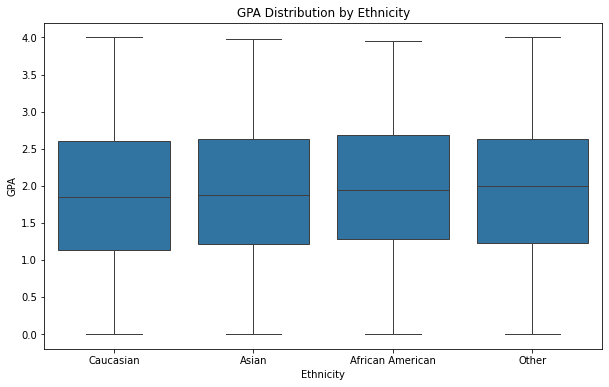

In [14]:
average_gpa_per_ethnicity = new_data.groupby('Ethnicity')['GPA'].mean().reset_index()
print(average_gpa_per_ethnicity)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Ethnicity', y='GPA', data=new_data)
plt.title('GPA Distribution by Ethnicity')
plt.xlabel('Ethnicity')
plt.ylabel('GPA')
plt.show()

          Ethnicity       GPA
0  African American  1.946437
1             Asian  1.922125
2         Caucasian  1.875905
3             Other  1.947696


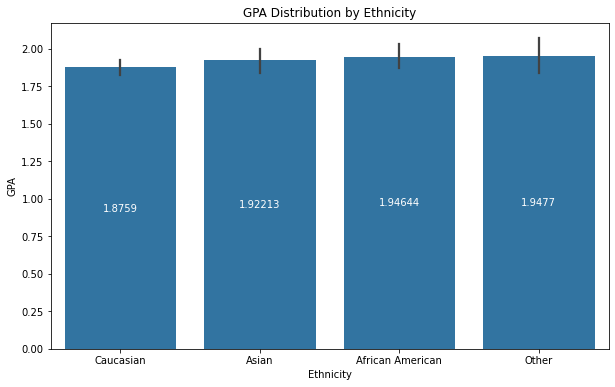

In [15]:
average_gpa_per_ethnicity = new_data.groupby('Ethnicity')['GPA'].mean().reset_index()
print(average_gpa_per_ethnicity)
plt.figure(figsize=(10, 6))
ax5=sns.barplot(x='Ethnicity', y='GPA', data=new_data)

for container in ax5.containers:
    ax5.bar_label(container,label_type="center",color="white")

plt.title('GPA Distribution by Ethnicity')
plt.xlabel('Ethnicity')
plt.ylabel('GPA')
plt.show()

  ParentalEducation       GPA
0        Bachelor's  1.809082
1       High School  1.944022
2            Higher  1.815812
3              None  1.893045
4      Some College  1.929881


Text(0, 0.5, 'Score GPA')

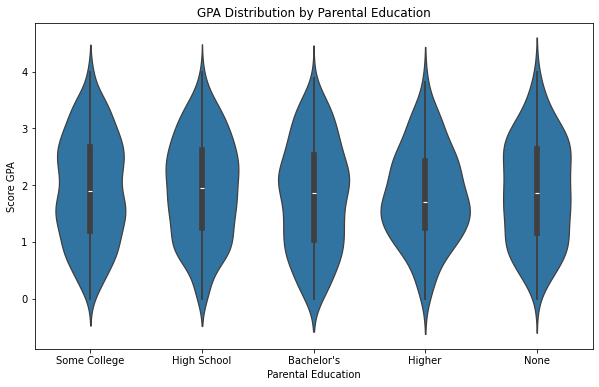

In [16]:
average_gpa_per_ParentalEducation = new_data.groupby('ParentalEducation')['GPA'].mean().reset_index()
print(average_gpa_per_ParentalEducation)
plt.figure(figsize=(10, 6))
sns.violinplot(x='ParentalEducation', y='GPA', data=new_data)
plt.title('GPA Distribution by Parental Education')
plt.xlabel('Parental Education')
plt.ylabel('Score GPA')

In [17]:
df.columns

Index(['StudentID', 'Age', 'Gender', 'Ethnicity', 'ParentalEducation',
       'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport',
       'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GPA',
       'GradeClass'],
      dtype='object')

In [18]:
df.groupby(["GradeClass", "Gender"])["GPA"].sum().unstack()

Gender,female,male
GradeClass,,
A,167.349166,164.665604
B,408.274518,399.175528
C,512.283349,527.675733
D,468.422482,448.813108
F,758.413813,704.524334


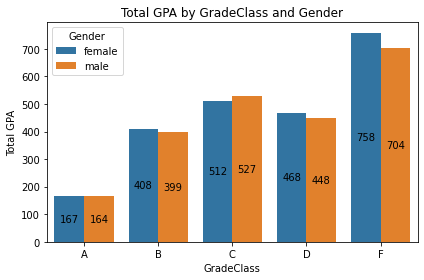

In [19]:
# Group and reshape
pivot = df.groupby(["GradeClass", "Gender"])["GPA"].sum().reset_index()

# Plot
ax6=sns.barplot(x="GradeClass",y="GPA",hue="Gender",data=pivot)

for u in ax6.containers:
    ax6.bar_label(u,label_type="center",fmt="%d")
plt.ylabel("Total GPA")
plt.title("Total GPA by GradeClass and Gender")
plt.tight_layout()
plt.show()

In [20]:
X = data.drop(['GradeClass', 'StudentID'], axis=1)
y = data['GradeClass']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
models = [DecisionTreeClassifier(), 
          RandomForestClassifier(), SVC(), KNeighborsClassifier(), GaussianNB()]
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(model)
    print(classification_report(y_test, y_pred))
    plt.show()

DecisionTreeClassifier()
              precision    recall  f1-score   support

         0.0       0.63      0.55      0.59        22
         1.0       0.66      0.82      0.73        49
         2.0       0.87      0.79      0.83        85
         3.0       0.76      0.81      0.79        86
         4.0       0.90      0.87      0.88       237

    accuracy                           0.82       479
   macro avg       0.76      0.77      0.76       479
weighted avg       0.83      0.82      0.83       479

RandomForestClassifier()
              precision    recall  f1-score   support

         0.0       0.85      0.50      0.63        22
         1.0       0.82      0.86      0.84        49
         2.0       0.92      0.86      0.89        85
         3.0       0.89      0.90      0.89        86
         4.0       0.94      0.99      0.96       237

    accuracy                           0.91       479
   macro avg       0.88      0.82      0.84       479
weighted avg       0.91    

In [21]:
X.shape


(2392, 13)

In [22]:
print(X_train.shape,
     X_test.shape,
     y_train.shape,
     y_test.shape)

(1913, 13) (479, 13) (1913,) (479,)


Model: DecisionTreeClassifier


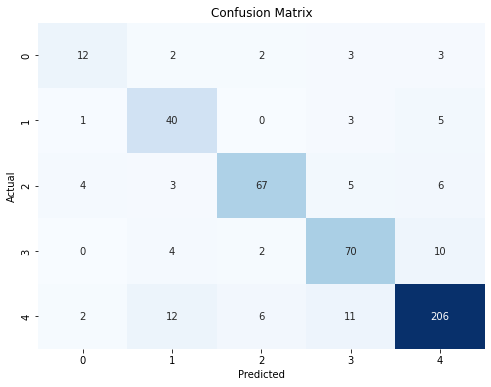

Model: RandomForestClassifier


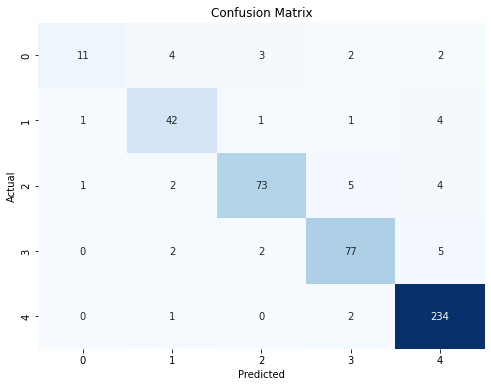

Model: SVC


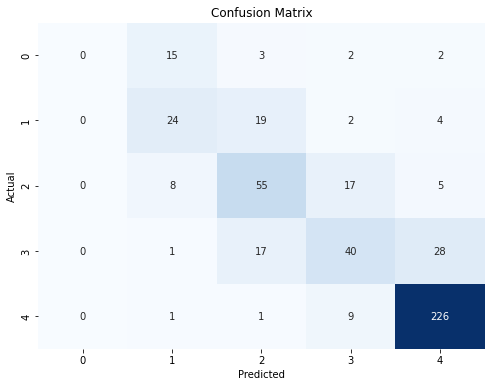

Model: KNeighborsClassifier


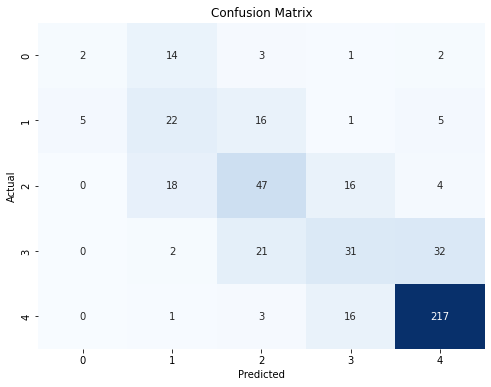

Model: GaussianNB


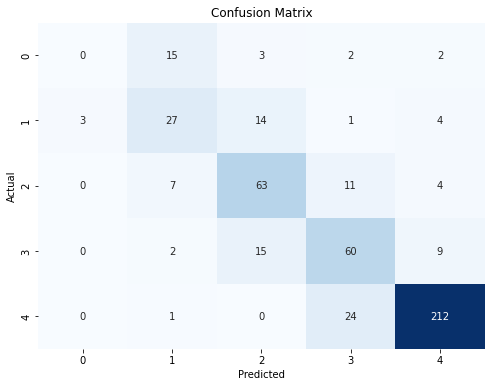

array([[  0,  15,   3,   2,   2],
       [  3,  27,  14,   1,   4],
       [  0,   7,  63,  11,   4],
       [  0,   2,  15,  60,   9],
       [  0,   1,   0,  24, 212]], dtype=int64)

In [23]:
def plot_confusion_matrix(model, X_test, y_test):
    y_pred = model.predict(X_test) # Use the fitted 'model' passed to the function
    cm = confusion_matrix(y_test, y_pred)

    model_name = type(model).__name__
    print(f"Model: {model_name}") 
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(model_name)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show() # Display the plot directly within the function
    return cm

# Pass the already fitted models from the previous cell
plot_confusion_matrix(models[0], X_test, y_test) # Decision Tree
plot_confusion_matrix(models[1], X_test, y_test) # Random Forest
plot_confusion_matrix(models[2], X_test, y_test) #SVC()
plot_confusion_matrix(models[3], X_test, y_test) #KNeighborsClassifier()
plot_confusion_matrix(models[4], X_test, y_test) #GaussianNB()

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

for model in models:
  print(model)
  y_pred = model.predict(X_test) # Predict for each model
  print("Accuracy:", accuracy_score(y_test, y_pred))
  print("Precision (macro):", precision_score(y_test, y_pred, average='macro')) # Use macro averaging for multiclass
  print("Recall (macro):", recall_score(y_test, y_pred, average='macro'))
  print("F1-score (macro):", f1_score(y_test, y_pred, average='macro'))
  print("-----------------------")

DecisionTreeClassifier()
Accuracy: 0.824634655532359
Precision (macro): 0.7627936523093518
Recall (macro): 0.7666336341585634
F1-score (macro): 0.7617085818838121
-----------------------
RandomForestClassifier()
Accuracy: 0.9123173277661796
Precision (macro): 0.8837100796477781
Recall (macro): 0.8197313991831645
F1-score (macro): 0.842390340875608
-----------------------
SVC()
Accuracy: 0.7202505219206681
Precision (macro): 0.49860040937924327
Recall (macro): 0.5111115037713643
F1-score (macro): 0.5028251897346946
-----------------------
KNeighborsClassifier()
Accuracy: 0.6659707724425887
Precision (macro): 0.5010879763511343
Recall (macro): 0.47378135796829507
F1-score (macro): 0.4748007388716083
-----------------------
GaussianNB()
Accuracy: 0.755741127348643
Precision (macro): 0.5424764959351426
Recall (macro): 0.5768772130577282
F1-score (macro): 0.5585620568745838
-----------------------


In [25]:
# create table for metric evaluation each models 
model_names = ['Decision Tree', 'Random Forest', 'SVM', 'KNN', 'Naive Bayes']

# Save metric evaluation
evaluation_results = []

for model, name in zip(models, model_names):
    y_pred = model.predict(X_test)  # Predict for each model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    
    # Adding name metric evaluation
    evaluation_results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision (macro)': precision,
        'Recall (macro)': recall,
        'F1-score (macro)': f1
    })

# Create DataFrame from Metric Evaluation
evaluation_df = pd.DataFrame(evaluation_results)

print(evaluation_df)
evaluation_df.head()

           Model  Accuracy  Precision (macro)  Recall (macro)  \
0  Decision Tree  0.824635           0.762794        0.766634   
1  Random Forest  0.912317           0.883710        0.819731   
2            SVM  0.720251           0.498600        0.511112   
3            KNN  0.665971           0.501088        0.473781   
4    Naive Bayes  0.755741           0.542476        0.576877   

   F1-score (macro)  
0          0.761709  
1          0.842390  
2          0.502825  
3          0.474801  
4          0.558562  


,Model,Accuracy,Precision (macro),Recall (macro),F1-score (macro)
0,Decision Tree,0.824635,0.762794,0.766634,0.761709
1,Random Forest,0.912317,0.883710,0.819731,0.842390
2,SVM,0.720251,0.498600,0.511112,0.502825
3,KNN,0.665971,0.501088,0.473781,0.474801
4,Naive Bayes,0.755741,0.542476,0.576877,0.558562


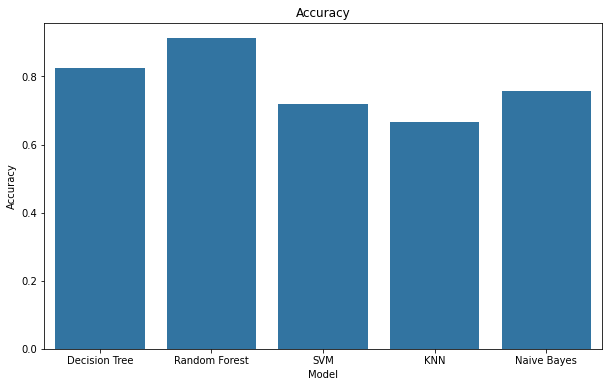

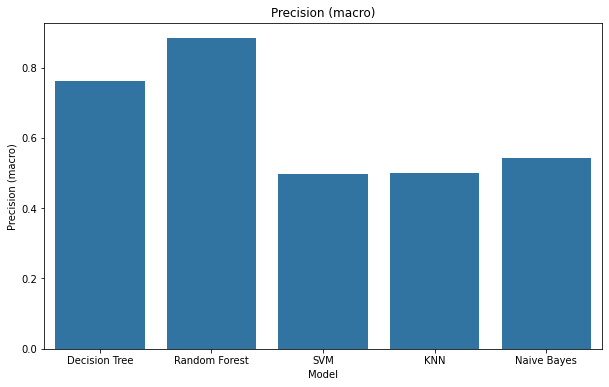

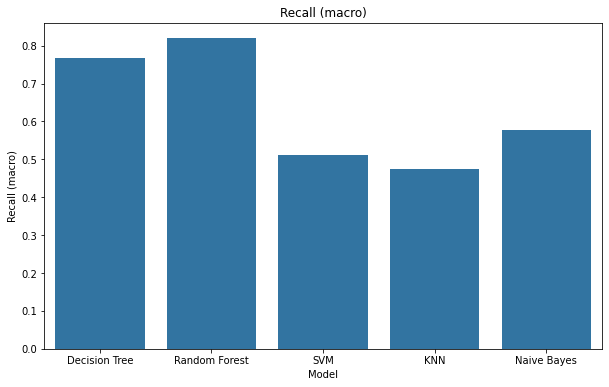

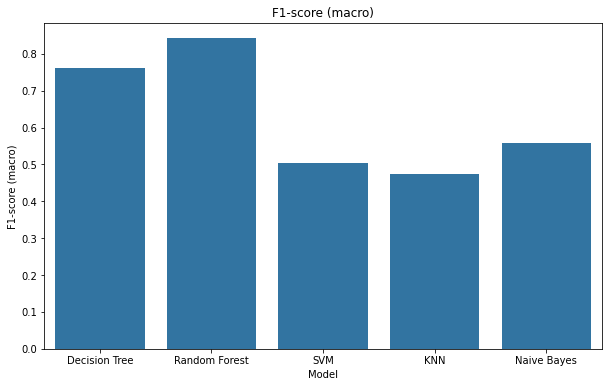

In [26]:
# create barplot metric evaluation 
for i in evaluation_df.columns[1:]:
  plt.figure(figsize=(10, 6))
  sns.barplot(x='Model', y=i, data=evaluation_df)
  plt.title(i)
  plt.show()  

Text(0.5, 1.0, 'Feature Importances in Random Forest Model')

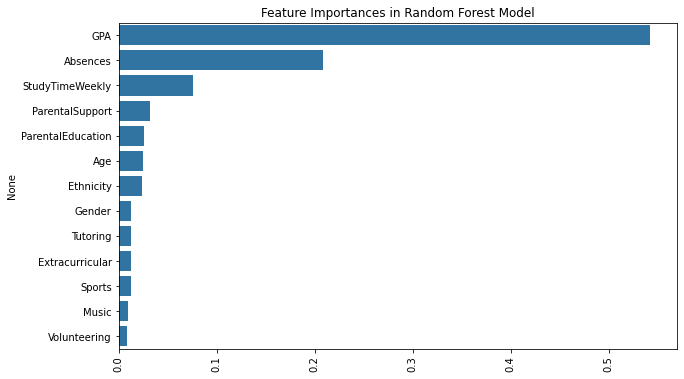

In [27]:
# feature importances in Random Forest Model

feature_importances = models[1].feature_importances_
feature_importances = pd.Series(feature_importances, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)
feature_importances

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances.values, y=feature_importances.index)
plt.xticks(rotation=90)
plt.title('Feature Importances in Random Forest Model')